# "El Desafío del Fast Food"

### Librerías 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import scipy.stats as stats
import statsmodels.api as sm
import scikit_posthocs as sp
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression


## Descripción del problema


un local de comida rápida con un menú variado y una clientela fiel, se encuentra en un momento crucial. A pesar de su popularidad, han notado fluctuaciones en las ventas y sospechan que ciertos días y horas son más rentables que otros. Además,  quieren entender mejor el comportamiento de sus clientes para ofrecer promociones más efectivas y personalizadas.


## Objetivo

El objetivo de este estudio es realizar un análisis integral del comportamiento de los clientes de un local de comidas rápidas. El proceso comenzará con una familiarización de la estructura de la base de datos, seguida de una exploración detallada para realizar una limpieza y organización de los datos. Posteriormente, se evaluarán las posibles relaciones entre las ventas con las horas del día, los días de la semana y la popularidad de los productos ofrecidos. Tras la limpieza y organización de los datos, se procederá a analizar estas relaciones, y se emplearán técnicas de clustering para segmentar a los clientes en grupos de comportamientos similares. Finalmente, se aplicarán modelos de machine learning, como los árboles de decisión y la regresión logística, para clasificar a los clientes en diferentes niveles de potencial (alto, medio, bajo). Esto permitirá predecir el comportamiento de nuevos clientes y desarrollar estrategias de marketing personalizadas para cada uno de los segmentos identificados.


## Carga de la base de datos

In [2]:
data = pd.read_csv('Base_Comida_Rapida_con_Clientes.csv', encoding='latin1', delimiter=';')

### Visualizar la base de datos

## Resumen de los datos
Los datos corresponden a un conjunto de ventas realizadas por el  local de comidas. Cada fila representa una venta individual con información detallada sobre el articulo vendido, el momento de la venta, detalles de la venta e identificación del cliente.

In [3]:
data.head()

,Factura,fecha_creacion,codigo,nombre item,Cantidad,Venta,descuento,impuesto,tpv,cliente
0,A683 00002999,2023-07-27 12:22:42.000,6692,K PHILADELPHIA STEAK,1,27685.0,0.0,2215.0,IRCC2838,284
1,A683 00003065,2023-07-31 12:16:22.653,9726,K ENSALADA MEXICANA LOMO EN COMBO,1,34630.0,0.0,2770.0,IRCC2838,612
2,A683 00003370,2023-08-22 13:29:56.640,10458,PT MR TEA DISPENSADOR 473 ML,1,4537.0,0.0,363.0,IRCC2838,214
3,A683 00003394,2023-08-23 15:37:43.000,1660,LLV MALTEADA DE FRUTOS DEL BOSQUE 355 ML,1,11574.0,0.0,926.0,IRCC2838,671
4,A683 00003434,2023-08-25 13:01:47.800,11513,K TODOTERRENO CALLEJERA EN COMBO Â,1,36944.0,0.0,2956.0,IRCC2838,780


### Variables 
- **Factura**: Esta variable contiene el identificador único de la factura de la venta realizada.
- **fecha_creacion**: Representa la fecha y hora exactas en que se realizó la venta.
- **codigo**: Un identificador único para el producto vendido.
- **nombre item**: Nombre del producto vendido.
- **Cantidad**: La cantidad de unidades del producto vendidas en esa transacción.
- **Venta**: Precio total de la venta.
- **descuento**: El monto de descuento aplicado a la venta.
- **impuesto**: El valor del impuesto aplicado a la transacción.
- **TPV**: Hace referencia al terminal punto de venta.
- **cliente**: Un identificador unico para cada cliente.


# Limpieza y preparación de datos

In [4]:
#nombres de las variables
print("\nInformación general del DataFrame:")
data.info()



Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601334 entries, 0 to 601333
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Factura         601334 non-null  object 
 1   fecha_creacion  601334 non-null  object 
 2   codigo          601334 non-null  int64  
 3   nombre item     601334 non-null  object 
 4   Cantidad        601334 non-null  int64  
 5   Venta           601334 non-null  float64
 6   descuento       601334 non-null  float64
 7   impuesto        601334 non-null  float64
 8   tpv             601334 non-null  object 
 9   cliente         601334 non-null  int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 45.9+ MB


### Trasnformación de variables
Se cuenta inicialmente con **601334** datos asociados a **10**  variables de interés, las cuales en un primer análisis no cuentan con datos faltantes. Debemos de trasnformar la variable **fecha_creacion** en una variable tipo **datetime**, y las variables **Venta**, **descuento**, e **impuesto** en variables tipo **int**

In [5]:
#transformar la variable 'fecha_creacion' a formato fecha
data['fecha_creacion'] = pd.to_datetime(data['fecha_creacion'])
data['fecha_creacion'].info()

#transformar la variable Venta, descuento e impuesto a int
data['Venta'] = data['Venta'].astype(int)
data['descuento'] = data['descuento'].astype(int)
data['impuesto'] = data['impuesto'].astype(int)

<class 'pandas.core.series.Series'>
RangeIndex: 601334 entries, 0 to 601333
Series name: fecha_creacion
Non-Null Count   Dtype         
--------------   -----         
601334 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 4.6 MB


In [6]:
#Estadísticas descriptivas para las variables numéricas
data[['Cantidad', 'Venta', 'descuento', 'impuesto']].describe()

,Cantidad,Venta,descuento,impuesto
count,601334.000000,6.013340e+05,601334.000000,601334.000000
mean,1.061255,9.386739e+03,26.305431,752.041426
std,0.850991,1.226109e+04,490.220844,980.052949
min,-22.000000,-4.583330e+05,0.000000,0.000000
25%,1.000000,4.537000e+03,0.000000,363.000000
50%,1.000000,6.018000e+03,0.000000,482.000000
75%,1.000000,1.388900e+04,0.000000,1111.000000
max,97.000000,1.777778e+06,15232.000000,142222.000000


### Eliminación de valores inconsistentes
Se realiza  un análisis de estadísticas descriptivas y se evidencia inconsistencia en las variables **Cantidad** y **Venta**, ya que contiene valores negativos registrados como valores mínimos, se procede a eliminar las filas que contienen en la  variable **cantidad** y **venta** un valor `<= a 0` ya que se espera de que, si se realizó una venta, por lo menos se haya vendido una unidad de algún producto y haya tenido un costo minimo `> a 0`.

In [7]:
# Eliminar las filas donde la variable 'Venta' tiene valores menores a cero 
data = data.drop(data[data['Venta'] <= 0].index)

print(f"Número de filas despues de eliminar valores insconsistentes en las variables 'unidad' y 'Venta':",data.shape[0])

Número de filas despues de eliminar valores insconsistentes en las variables 'unidad' y 'Venta': 469987


Al realizar la eliminación de los valores insconsistentes nos queda un tota **469987** datos para el análisis

### Identificación de duplicados
Se procede a evidenciar si la base de datos cuenta con duplicados para evitar la distorsión en los análisis posteriores.

In [8]:
# Identificar duplicados
duplicates = data.duplicated(keep=False)
print("Número de filas duplicadas:", duplicates.sum())

# Mostrar las filas duplicadas
duplicated_rows = data[duplicates]
print("Filas duplicadas:")
duplicated_rows.head(6)

Número de filas duplicadas: 60
Filas duplicadas:


,Factura,fecha_creacion,codigo,nombre item,Cantidad,Venta,descuento,impuesto,tpv,cliente
6433,A683 00004206,2023-10-13 10:54:51.000,11519,K TODOTERRENO CLASICA EN COMBO Â,1,35093,0,2807,IRCC2838,211
6434,A683 00004206,2023-10-13 10:54:51.000,11519,K TODOTERRENO CLASICA EN COMBO Â,1,35093,0,2807,IRCC2838,211
138341,A021 00135372,2023-12-01 12:47:09.000,1662,LLV MALTEADA DE MACADAMIA 355 ML,1,11574,0,926,IRCC118,278
138342,A021 00135372,2023-12-01 12:47:09.000,1662,LLV MALTEADA DE MACADAMIA 355 ML,1,11574,0,926,IRCC118,278
306529,044F 00002517,2023-07-16 14:35:01.010,11801,LLV TODOTERRENO ED. ESPECIAL,1,31389,0,2511,IRCC73,314
306530,044F 00002517,2023-07-16 14:35:01.010,11801,LLV TODOTERRENO ED. ESPECIAL,1,31389,0,2511,IRCC73,314


In [9]:
#Eliminar duplicados
data_clean = data.drop_duplicates()

#verificar que se eliminaron los duplicados
print("Número de filas duplicadas:", data_clean.duplicated().sum())
print("Número de filas despues de eliminar duplicados:", data_clean.shape[0])

Número de filas duplicadas: 0
Número de filas despues de eliminar duplicados: 469957


### Eliminación de duplicados

Se identificaron un total de **60** filas duplicadas en la base de datos. Tras la eliminación de estos duplicados, se obtuvo un conjunto de **469957** filas depuradas, listas para los análisis posteriores. Esta limpieza garantiza que los resultados reflejen con precisión el comportamiento de los clientes y evita distorsiones en los procesos de análisis

In [10]:
#Analisis descripitivo
data_clean[['Cantidad', 'Venta', 'descuento', 'impuesto']].describe()

,Cantidad,Venta,descuento,impuesto
count,469957.000000,4.699570e+05,469957.000000,469957.000000
mean,1.062089,1.201827e+04,33.651966,961.472828
std,0.836154,1.264739e+04,554.301643,1011.793685
min,1.000000,9.250000e+02,0.000000,74.000000
25%,1.000000,5.463000e+03,0.000000,437.000000
50%,1.000000,6.482000e+03,0.000000,518.000000
75%,1.000000,1.657400e+04,0.000000,1326.000000
max,97.000000,1.777778e+06,15232.000000,142222.000000


### Creación de variables
Se procede a la creación de las variables **dia_semana** y **hora_dia** desagregadas de la variable **fecha_creacion**, con el fin de analizar la relación entre las ventas y factores temporales, como los días de la semana y las horas del día. Este proceso permitirá evaluar patrones de comportamiento y detectar posibles tendencias en las ventas a lo largo del tiempo.

In [11]:
# Crear nuevas columnas para el día de la semana y la hora del día
data_clean['dia_semana'] = data_clean['fecha_creacion'].dt.day_name()
dias_semana_ingles_espanol = {
    'Monday': 'Lunes',
    'Tuesday': 'Martes',
    'Wednesday': 'Miércoles',
    'Thursday': 'Jueves',
    'Friday': 'Viernes',
    'Saturday': 'Sábado',
    'Sunday': 'Domingo'
}
data_clean['dia_semana'] = data_clean['dia_semana'].replace(dias_semana_ingles_espanol)

data_clean['hora_dia'] = data_clean['fecha_creacion'].dt.hour
data_clean.head(5)

C:\Users\JUAN PABLO\AppData\Local\Temp\ipykernel_27132\3696269702.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['dia_semana'] = data_clean['fecha_creacion'].dt.day_name()
C:\Users\JUAN PABLO\AppData\Local\Temp\ipykernel_27132\3696269702.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['dia_semana'] = data_clean['dia_semana'].replace(dias_semana_ingles_espanol)
C:\Users\JUAN PABLO\AppData\Local\Temp\ipykernel_27132\3696269702.py:14: SettingWithCopyWarning: 
A value is trying t

,Factura,fecha_creacion,codigo,nombre item,Cantidad,Venta,descuento,impuesto,tpv,cliente,dia_semana,hora_dia
0,A683 00002999,2023-07-27 12:22:42.000,6692,K PHILADELPHIA STEAK,1,27685,0,2215,IRCC2838,284,Jueves,12
1,A683 00003065,2023-07-31 12:16:22.653,9726,K ENSALADA MEXICANA LOMO EN COMBO,1,34630,0,2770,IRCC2838,612,Lunes,12
2,A683 00003370,2023-08-22 13:29:56.640,10458,PT MR TEA DISPENSADOR 473 ML,1,4537,0,363,IRCC2838,214,Martes,13
3,A683 00003394,2023-08-23 15:37:43.000,1660,LLV MALTEADA DE FRUTOS DEL BOSQUE 355 ML,1,11574,0,926,IRCC2838,671,Miércoles,15
4,A683 00003434,2023-08-25 13:01:47.800,11513,K TODOTERRENO CALLEJERA EN COMBO Â,1,36944,0,2956,IRCC2838,780,Viernes,13


# Análisis Exploratorio de Datos

### Serie de tiempo sobre las ventas diarias
Se procede a realizar una serie de tiempo de las ventas diarias para evidenciar posibles patrones a lo largo del tiempo. Este análisis permitirá identificar tendencias, estacionalidades o fluctuaciones en las ventas, proporcionando información valiosa sobre los días con mayor o menor actividad comercial. 

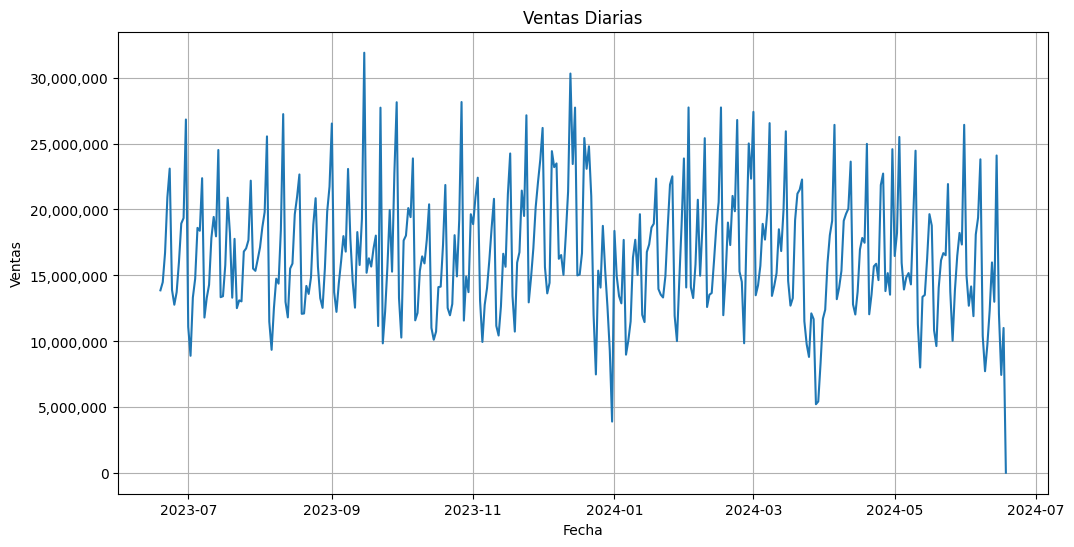

Inicio de la serie de tiempo: 2023-06-19 09:44:36.353000
Fin de la serie de tiempo: 2024-06-18 10:00:51.010000


In [12]:
# Agrupar las ventas por día
ventas_diarias = data_clean.groupby(data_clean['fecha_creacion'].dt.date).apply(
    lambda x: (x['Venta'] + x['impuesto'] - x['descuento']).sum()
)

#Serie de tiempo
plt.figure(figsize=(12, 6))
ventas_diarias.plot()
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x):,}'))
plt.title('Ventas Diarias')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.grid(True)
plt.show()


print(f"Inicio de la serie de tiempo: {data_clean['fecha_creacion'].min()}")
print(f"Fin de la serie de tiempo: {data_clean['fecha_creacion'].max()}")

### Análisis de la serie de tiempo

El estudio inicia **2023-06-19** y termina el **2024-06-18**. 

La serie evidencia fluctuaciones diarias significativas, los picos de venta son notables en ciertas epocas del año esto podría estar relacionado con días de mayor demanda. Hay indicios de un comportamiento estacional. Se observan períodos en los que las ventas parecen aumentar o disminuir en patrones repetitivos. Se observa hacia finales de diciembre y principios de enero de 2024 una caída en las ventas, lo cual podría estar relacionado con la disminución de consumo habitual por la llegada de las festividades de fin de año.

Se evidencia un momento anomalo de ventas al finalizar el estudio, especificamente en la fecha **2024-06-18**. Posteriormente se hara un estudio de esta fecha en concreto.

In [13]:
# Filtrar el DataFrame para obtener todas las filas relacionadas con la fecha de estudio
datos_fecha_especifica = data_clean[data_clean['fecha_creacion'].dt.date == pd.to_datetime('2024-06-18').date()]

datos_fecha_especifica.head()

,Factura,fecha_creacion,codigo,nombre item,Cantidad,Venta,descuento,impuesto,tpv,cliente,dia_semana,hora_dia
562869,338F 00015793,2024-06-18 10:00:27.000,10902,PT DESAYUNO QUESO TOCINETA,1,18426,0,1474,IRCC117,578,Martes,10
562870,338F 00015793,2024-06-18 10:00:27.000,10912,PT GRANIZADO DE CAFE 355 ML,1,2778,0,222,IRCC117,578,Martes,10
562871,338F 00015793,2024-06-18 10:00:51.010,10902,PT DESAYUNO QUESO TOCINETA,1,18426,0,1474,IRCC117,578,Martes,10


### Análisis y eliminación de la la ultima fecha de la serie de tiempo

Se realizó la filtración de una fecha específica en la serie de tiempo, y se evidenció que solo existen 3 registros para dicha fecha, lo cual no es representativo para el análisis. Por lo tanto, se procedió a la eliminación de ese último día en la serie.

In [14]:
#Eliminar la Ultima fecha
data_clean = data_clean.drop(data_clean[data_clean['fecha_creacion'].dt.date == pd.to_datetime('2024-06-18').date()].index)


### Serie de tiempo actualizada

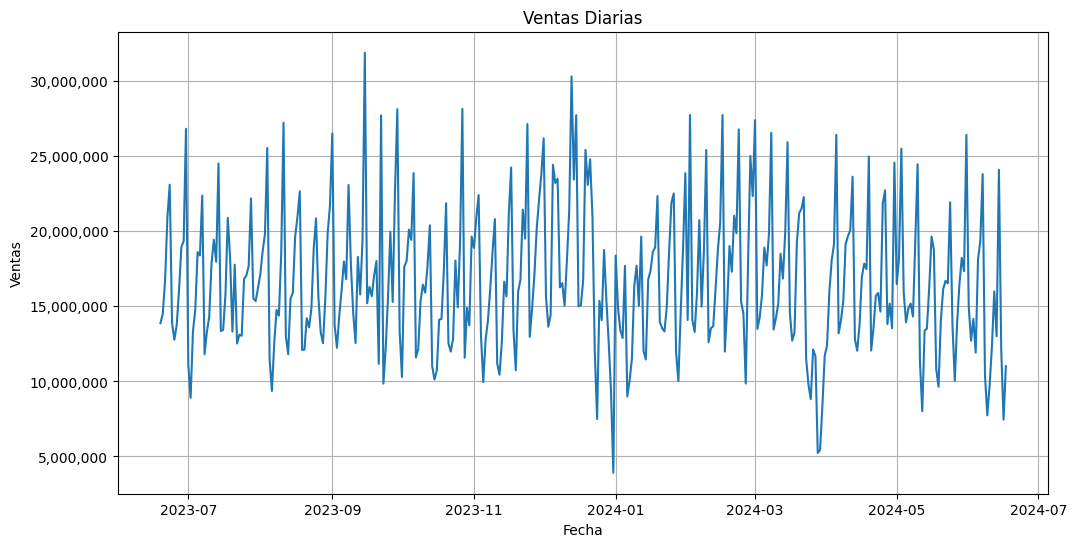

In [37]:
ventas_diarias = data_clean.groupby(data_clean['fecha_creacion'].dt.date).apply(
    lambda x: (x['Venta'] + x['impuesto'] - x['descuento']).sum()
)

# Crear un gráfico de serie de tiempo
plt.figure(figsize=(12, 6))
ventas_diarias.plot()
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x):,}'))
plt.title('Ventas Diarias')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.grid(True)
plt.show()


### Comportamiento del total de las ventas por hora del día agrupadada por día de la semana

Se procede a realizar un grafico donde se evidencia el valor de las ventas totales en las horarios habituales de atención agrupadas por el día de la semana.

C:\Users\JUAN PABLO\AppData\Local\Temp\ipykernel_27132\3156204613.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ventas_por_día_hora = data_clean.groupby(['dia_semana', 'hora_dia']).apply(


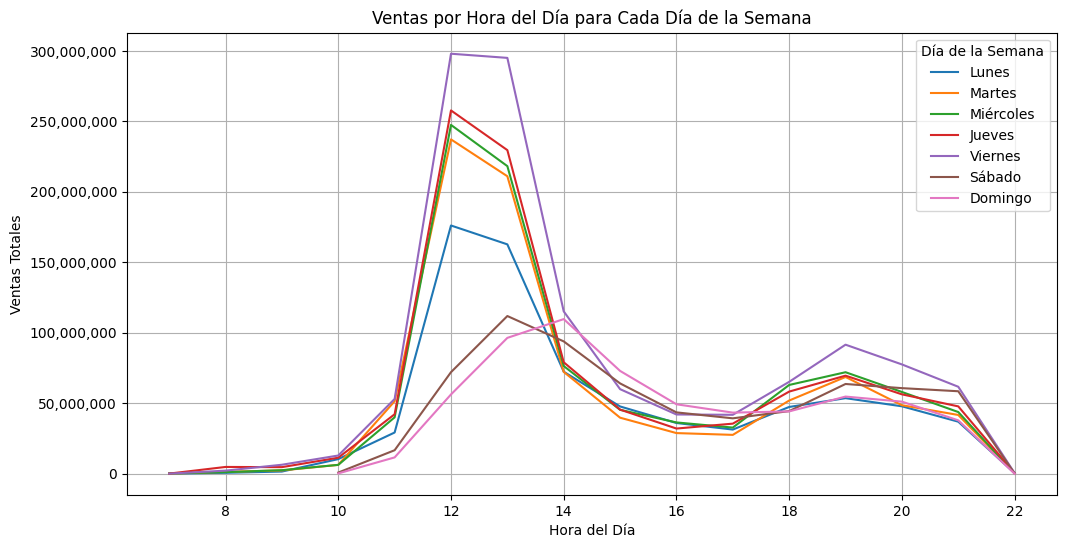

In [40]:
# Agrupar por día de la semana y hora del día, sumando las ventas
ventas_por_día_hora = data_clean.groupby(['dia_semana', 'hora_dia']).apply(
    lambda x: (x['Venta'] + x['impuesto'] - x['descuento']).sum()
).reset_index(name='venta_total')

# orden días semana
orden_días = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
ventas_por_día_hora['dia_semana'] = pd.Categorical(ventas_por_día_hora['dia_semana'], categories=orden_días, ordered=True)



plt.figure(figsize=(12, 6))
#serie de tiempo por cada día de la semana
for dia in orden_días:
    ventas_dia = ventas_por_día_hora[ventas_por_día_hora['dia_semana'] == dia]
    plt.plot(ventas_dia['hora_dia'], ventas_dia['venta_total'], label=dia)

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x):,}'))
plt.title('Ventas por Hora del Día para Cada Día de la Semana')
plt.xlabel('Hora del Día')
plt.ylabel('Ventas Totales')
plt.legend(title="Día de la Semana")
plt.grid(True)
plt.show()

### Análisis de la serie

Se observa un aumento claro en las ventas que comienza alrededor de las 10:00 am todos los días de la semana, coincidiendo probablemente con el horario en que los clientes empiezan a realizar pedidos de desayuno o se preparan para el almuerzo temprano. Gráficamente, se evidencia que el mayor porcentaje de ventas ocurre entre las 12:00 pm y las 2:00 pm, una tendencia constante de lunes a viernes. Además, se destaca que el viernes es el día con el mayor volumen de ventas, seguido por el jueves, miércoles y martes. Por otro lado, los días sábado y domingo presentan un comportamiento muy similar en cuanto a las ventas, con picos más pronunciados durante el mediodía y una caída más rápida hacia la tarde.

### Estadísticas descriptivas del total de ventas por hora del día agrupadas por el día de la semana


In [41]:
# Agrupar por hora del día y calulo de estadisticas descriptivas
estadisticas_por_hora = data_clean.groupby('hora_dia').apply(
    lambda x: pd.Series({
        'media': (x['Venta'] + x['impuesto'] - x['descuento']).mean(),
        'mediana': (x['Venta'] + x['impuesto'] - x['descuento']).median(),
        'desviacion_estandar': (x['Venta'] + x['impuesto'] - x['descuento']).std(),
        'minimo': (x['Venta'] + x['impuesto'] - x['descuento']).min(),
        'maximo': (x['Venta'] + x['impuesto'] - x['descuento']).max()
    })
).reset_index()

# Mostrar el DataFrame con las estadísticas
print(estadisticas_por_hora)

    hora_dia         media  mediana  desviacion_estandar  minimo     maximo
0          7  10274.074074   7250.0          7900.326843  2000.0    30000.0
1          8  19275.070076  10500.0         56068.007330   537.0   758500.0
2          9  16415.680751   8000.0         55434.123744  2000.0  1190000.0
3         10  15709.834525   7000.0         40774.509930   111.0  1155000.0
4         11  14172.750914   7000.0         29940.468972    74.0  1455000.0
5         12  13661.099938   7000.0         14197.772315   111.0  1920000.0
6         13  13046.223900   7000.0         11236.456150   111.0   799000.0
7         14  12401.783374   7000.0         11198.526003 -1858.0   855000.0
8         15  12120.698541   7000.0          9751.294551 -1427.0   450000.0
9         16  12077.911990   7000.0         11570.865948    74.0   850000.0
10        17  12123.342612   7000.0          9236.051724    74.0   162000.0
11        18  12405.899125   7000.0         11792.880095    74.0   704000.0
12        19

C:\Users\JUAN PABLO\AppData\Local\Temp\ipykernel_27132\3566469938.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  estadisticas_por_hora = data_clean.groupby('hora_dia').apply(


Al observar los datos de las ventas por hora, se puede notar que la **media** de las ventas no es un buen indicador de la tendencia central debido a los valores altos de **desviación estándar**. Esto indica una gran variabilidad en las ventas por hora, lo que a su vez es evidencia de que los datos no siguen una distribución normal. En lugar de confiar en la **media**, la **mediana** proporciona una representación más precisa del comportamiento típico de las ventas por hora, ya que no se ve afectada por los valores extremos 

## Prueba estadística  de Kruskal-Wallis

La prueba de Kruskal-Wallis es una prueba estadística no paramétrica que se utiliza para comparar si existen diferencias significativas entre los grupos, en este caso, las ventas entre diferentes horas del día. Esta prueba nos apoyará en la decisión de concluir si hay diferencia significativa en las ventas entre las diferentes horas del día.

In [42]:
# Realizar la prueba de Kruskal-Wallis para comparar las ventas entre las diferentes horas del día
ventas_por_hora = [
    (data_clean[data_clean['hora_dia'] == hora]['Venta'] + 
     data_clean[data_clean['hora_dia'] == hora]['impuesto'] - 
     data_clean[data_clean['hora_dia'] == hora]['descuento']) 
    for hora in data_clean['hora_dia'].unique()
]
kruskal_result = stats.kruskal(*ventas_por_hora)

# Imprimir los resultados de la prueba de Kruskal-Wallis
print(f"Resultado de Kruskal-Wallis: H={kruskal_result.statistic}, p={kruskal_result.pvalue}")

Resultado de Kruskal-Wallis: H=500.52056780236757, p=4.386683371538152e-97


### Conclusión prueba de Kruskal-Wallis
Dado un **P-value < a 0.05** , se puede concluir que existen diferencias significativas en las ventas entre las diferentes horas del día. Esto indica que las ventas no siguen la misma distribución en todas las horas, y que hay franjas horarias donde las ventas son significativamente mayores o menores que en otras.

## Comportamiento de total de las ventas agrupada por día de la semana


In [43]:
# Estadísticas descriptivas por día de la semana
estadisticas_por_dia = data_clean.groupby('dia_semana').apply(
    lambda x: pd.Series({
        'media': (x['Venta'] + x['impuesto'] - x['descuento']).mean(),
        'mediana': (x['Venta'] + x['impuesto'] - x['descuento']).median(),
        'desviacion_estandar': (x['Venta'] + x['impuesto'] - x['descuento']).std(),
        'minimo': (x['Venta'] + x['impuesto'] - x['descuento']).min(),
        'maximo': (x['Venta'] + x['impuesto'] - x['descuento']).max()
    })
).reset_index()
print(estadisticas_por_dia)

  dia_semana         media  mediana  desviacion_estandar  minimo     maximo
0    Domingo  12446.254455   7000.0          9757.298907 -1858.0   262900.0
1     Jueves  13255.465155   7000.0         15935.637808    74.0  1920000.0
2      Lunes  12787.343344   7000.0         12673.898765    74.0  1091500.0
3     Martes  13059.944431   7000.0         15156.489176    74.0  1455000.0
4  Miércoles  13051.470969   7000.0         13210.390494    74.0   855000.0
5     Sábado  12554.845857   7000.0         10846.491872    74.0   629000.0
6    Viernes  13131.964198   7000.0         14792.386238 -1858.0  1190000.0


C:\Users\JUAN PABLO\AppData\Local\Temp\ipykernel_27132\1464348822.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  estadisticas_por_dia = data_clean.groupby('dia_semana').apply(


Al igual que en el análisis por horas, los resultados por días de la semana muestran que la media de las ventas no es un buen indicador representativo del comportamiento central debido a las altas desviaciones estándar observadas en cada día. Esto indica una alta variabilidad en las ventas diarias, sugiriendo que los datos no siguen una distribución normal. Los valores extremos, como las ventas de productos de mayor valor o eventos aislados, están influyendo en la media.

Por el contrario, la mediana se mantiene constante en 6482, lo que sugiere que este es el precio típico de los productos más vendidos en cualquier día de la semana.

## Prueba estadística  de Kruskal-Wallis

Nuevamente la utilizaremos para comparar si existen diferencias significativas entre los grupos, en este caso, las ventas agrupadas por los días de la semana. Esta prueba nos apoyará en la decisión de concluir si hay diferencia significativa en las ventas entre los días de la semana.

In [44]:
#prueba de Kruskal-Wallis
kruskal_result = stats.kruskal(*[
    (data_clean[data_clean['dia_semana'] == dia]['Venta'] +
     data_clean[data_clean['dia_semana'] == dia]['impuesto'] -
     data_clean[data_clean['dia_semana'] == dia]['descuento'])
    for dia in ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
])
print(f"Resultado de Kruskal-Wallis: H={kruskal_result.statistic}, p={kruskal_result.pvalue}")

Resultado de Kruskal-Wallis: H=68.3101784629001, p=9.076760876806197e-13


 ### Conclusión prueba de Kruskal-Wallis
 
 Dado un **p-valor < a 0.05** se puede concluir que existen diferencias significativas en las ventas entre los diferentes días de la semana. Esto significa que las ventas no siguen la misma distribución en todos los días, y hay días en los que las ventas son significativamente mayores o menores que en otros.

In [45]:

ventas_por_día = data_clean.groupby('dia_semana').apply(
    lambda x: (x['Venta'] + x['impuesto'] - x['descuento']).sum()
).reset_index(name='venta_total')

#días de la semana en orden 
orden_días = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
ventas_por_día['dia_semana'] = pd.Categorical(ventas_por_día['dia_semana'], categories=orden_días, ordered=True)

ventas_ordenadas_dia = ventas_por_día.sort_values('dia_semana')


C:\Users\JUAN PABLO\AppData\Local\Temp\ipykernel_27132\3540514637.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ventas_por_día = data_clean.groupby('dia_semana').apply(


## Análisis grafico de ventas totales por día de la semana

Se procede a graficar las las ventas totales por día y a identificar los días con más ventas totales.

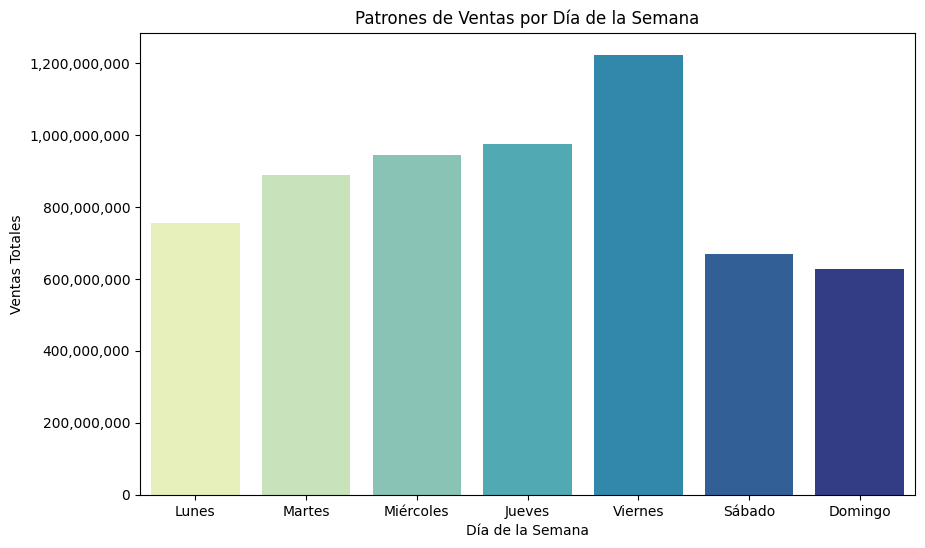

Días más rentables (Top 10):
  dia_semana  venta_total
6    Viernes   1223268729
1     Jueves    975191316
4  Miércoles    943869329
3     Martes    889565055
2      Lunes    754478832
5     Sábado    669838691
0    Domingo    627851306


In [49]:
# Crear una visualización de las ventas por día de la semana
plt.figure(figsize=(10, 6))
sns.barplot(x='dia_semana', y='venta_total', hue='dia_semana', data=ventas_ordenadas_dia, palette="YlGnBu", legend=False)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x):,}'))
plt.title('Patrones de Ventas por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Ventas Totales')
plt.show()

# Identificar los días más rentables (días con mayores ventas)
dias_rentables = ventas_ordenadas_dia.sort_values(by='venta_total', ascending=False).head(10)
print("Días más rentables (Top 10):")
print(dias_rentables)

### Conclusión del análisis de ventas totales por día

Dada la significancia de la prueba de Kruskal-Wallis y el análisis gráfico de las ventas totales por día, se puede concluir que los días con más ventas totales son los viernes, seguidos de los jueves. Además, hay evidencia suficiente para concluir que estas diferencias son estadísticamente significativas en comparación con los días de menor volumen de ventas.

## Análisis final de las ventas por día de la semana y hora

C:\Users\JUAN PABLO\AppData\Local\Temp\ipykernel_27132\3953170444.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ventas_por_día_hora = data_clean.groupby(['dia_semana', 'hora_dia']).apply(
C:\Users\JUAN PABLO\AppData\Local\Temp\ipykernel_27132\3953170444.py:14: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  ventas_pivot = ventas_ordenadas.pivot_table(index='hora_dia', columns='dia_semana', values='venta_total', aggfunc='sum')


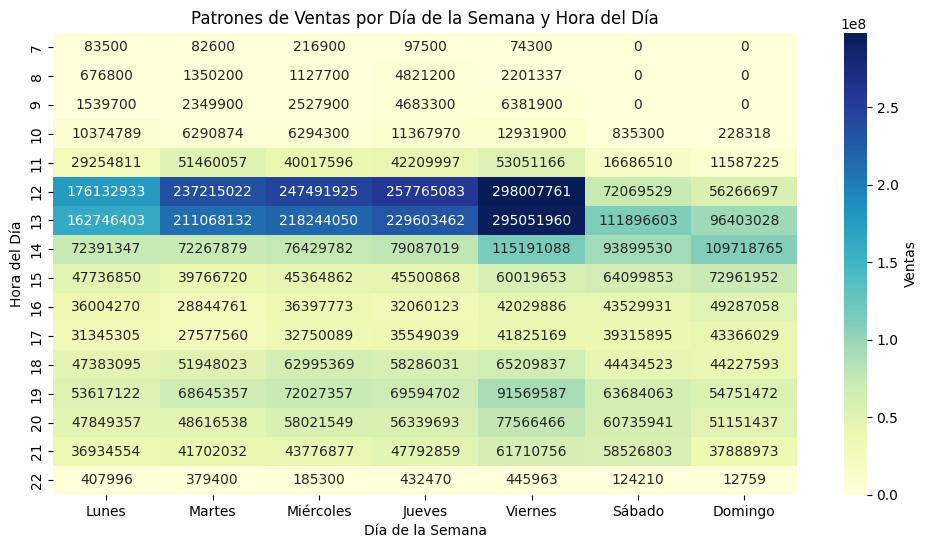

In [51]:
# Agrupar por día de la semana y hora del día, y sumar las ventas
ventas_por_día_hora = data_clean.groupby(['dia_semana', 'hora_dia']).apply(
    lambda x: (x['Venta'] + x['impuesto'] - x['descuento']).sum()
).reset_index(name='venta_total')

# días de la semana en orden
orden_días = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
ventas_por_día_hora['dia_semana'] = pd.Categorical(ventas_por_día_hora['dia_semana'], categories=orden_días, ordered=True)

# Ordenar por día de la semana y hora
ventas_ordenadas = ventas_por_día_hora.sort_values(['dia_semana', 'hora_dia'])

# Crear un pivot table para usar en el heatmap
ventas_pivot = ventas_ordenadas.pivot_table(index='hora_dia', columns='dia_semana', values='venta_total', aggfunc='sum')

# Visualización del heatmap para identificar patrones de ventas
plt.figure(figsize=(12, 6))
sns.heatmap(ventas_pivot, cmap="YlGnBu", annot=True, fmt=".0f", cbar_kws={'label': 'Ventas'})
plt.title('Patrones de Ventas por Día de la Semana y Hora del Día')
plt.xlabel('Día de la Semana')
plt.ylabel('Hora del Día')
plt.show()

In [52]:
# Identificar los momentos más rentables (días y horas con mayores ventas)
momentos_rentables = ventas_ordenadas.sort_values(by='venta_total', ascending=False).head(10)
print("Momentos más rentables (Top 10):")
print(momentos_rentables)

Momentos más rentables (Top 10):
   dia_semana  hora_dia  venta_total
95    Viernes        12    298007761
96    Viernes        13    295051960
18     Jueves        12    257765083
66  Miércoles        12    247491925
50     Martes        12    237215022
19     Jueves        13    229603462
67  Miércoles        13    218244050
51     Martes        13    211068132
34      Lunes        12    176132933
35      Lunes        13    162746403


## Conclusión

Los mayores volúmenes de ventas se concentran en los días jueves y viernes, específicamente entre las 12:00 pm y 1:00 pm, lo que sugiere que estos días y horas representan el pico de actividad comercial. Este comportamiento es consistente con los hábitos de consumo de los clientes.

Los días de la semana con mayores ventas son, en orden de importancia:
- Viernes: Se observa un pico significativo en el mediodía, y las ventas se mantienen relativamente altas durante todo el día.

- Jueves: Presenta un comportamiento similar al viernes, aunque ligeramente inferior en términos de volumen total de ventas.
- Miércoles y martes: Aunque muestran altos niveles de ventas alrededor del mediodía, no alcanzan los volúmenes de los jueves y viernes.
- Lunes: Tiene un patrón de ventas más estable, pero con un volumen general más bajo en comparación con el resto de la semana.

Fines de semana:

- Los sábados y domingos tienen un comportamiento notablemente distinto. Mientras que las ventas son altas alrededor del mediodía, no se alcanzan los niveles observados durante los días de semana, y las ventas caen más rapido en las horas posteriores.

Tendencias horarias:

- A lo largo de toda la semana, se observa que las ventas aumentan significativamente a partir de las 10:00 am, alcanzando su punto máximo entre las 12:00 pm y 2:00 pm, antes de caer de manera constante hacia la tarde.

Implicaciones para la toma de decisiones:

- **Optimización de personal y recursos**: Los datos sugieren que se deben concentrar recursos (personal, inventario, promociones) en los días jueves y viernes, especialmente durante el pico del mediodía.
 
- **Promociones y estrategias**: Para aprovechar las horas de menor actividad, como las tardes y las mañanas de lunes a miércoles, podrían implementarse promociones especiales para atraer a más clientes en esos momentos.

- **Gestión de estrategias los fines de semana**: Dado que los fines de semana no alcanzan los niveles de ventas de los días de semana, las estrategias pueden ajustarse para maximizar las ventas en estas franjas, enfocándose en las horas de mayor tráfico, que ocurren al mediodía.

#	Análisis de Popularidad de Ítems

Se procedió a la creación de un subconjunto de datos para agrupar las ventas por hora del día correspondiente al día de mayor afluencia de ventas, que es el viernes. 

In [54]:
# Crear un subconjunto de datos para mostrar las ventas por día y hora en un día específico
subconjunto_viernes = data_clean[data_clean['dia_semana'] == 'Viernes']

# Agrupar
ventas_viernes = subconjunto_viernes.groupby(['nombre item', 'hora_dia']).apply(
    lambda x: (x['Venta'] + x['impuesto'] - x['descuento']).sum()
).reset_index(name='venta_total_viernes')

ventas_viernes.head(10)


C:\Users\JUAN PABLO\AppData\Local\Temp\ipykernel_27132\971642743.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ventas_viernes = subconjunto_viernes.groupby(['nombre item', 'hora_dia']).apply(


,nombre item,hora_dia,venta_total_viernes
0,AD. SALCHICHA DESAYUNO,10,27000
1,AD. SALCHICHA DESAYUNO,12,9000
2,CONO 1 BOLA,12,6500
3,CONO 1 BOLA,13,6500
4,CONO 2 BOLAS,12,17000
5,CONO 2 BOLAS,17,8500
6,CONO 2 BOLAS,19,25000
7,DOMICILIOS RESTAURANTES EC,8,12000
8,DOMICILIOS RESTAURANTES EC,9,36000
9,DOMICILIOS RESTAURANTES EC,10,162000


In [58]:
# Identificar los ítems más y menos vendidos por cada franja horaria
mas_vendidos_viernes = ventas_viernes.groupby('hora_dia').apply(lambda x: x.nlargest(1, 'venta_total_viernes')).reset_index(drop=True)
menos_vendidos_viernes = ventas_viernes.groupby('hora_dia').apply(lambda x: x.nsmallest(1, 'venta_total_viernes')).reset_index(drop=True)

# Mostrar los ítems más vendidos por cada franja horaria
print("Ítems más vendidos por franja horaria el viernes:")
print(mas_vendidos_viernes)

# Mostrar los ítems menos vendidos por cada franja horaria
print("\nÍtems menos vendidos por franja horaria el viernes:")
print(menos_vendidos_viernes)

Ítems más vendidos por franja horaria el viernes:
                                 nombre item  hora_dia  venta_total_viernes
0   PT DESAYUNO QUESO TOCINETA                       7                19900
1                LLV  CORRALÃSIMA CON QUESO         8               513000
2                           LLV CORRAL QUESO         9              1281600
3                                 LLV CORRAL        10              2124000
4   LLV PAPAS CORRAL MEDIANAS                       11              5070500
5   PT PAPAS CORRAL MEDIANAS                        12             22889460
6   PT PAPAS CORRAL MEDIANAS                        13             22770220
7   PT PAPAS CORRAL MEDIANAS                        14              9131520
8   PT PAPAS CORRAL MEDIANAS                        15              4793840
9   PT PAPAS CORRAL MEDIANAS                        16              2811380
10  PT PAPAS CORRAL MEDIANAS                        17              2828480
11  PT PAPAS CORRAL MEDIANAS          

C:\Users\JUAN PABLO\AppData\Local\Temp\ipykernel_27132\2091716840.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  mas_vendidos_viernes = ventas_viernes.groupby('hora_dia').apply(lambda x: x.nlargest(1, 'venta_total_viernes')).reset_index(drop=True)
C:\Users\JUAN PABLO\AppData\Local\Temp\ipykernel_27132\2091716840.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  menos_vendidos_viernes = ventas_viernes

c:\Users\JUAN PABLO\Desktop\Juan Manuel U\Prueba nutresa\prueba_nutresa\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 141 (\x8d) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


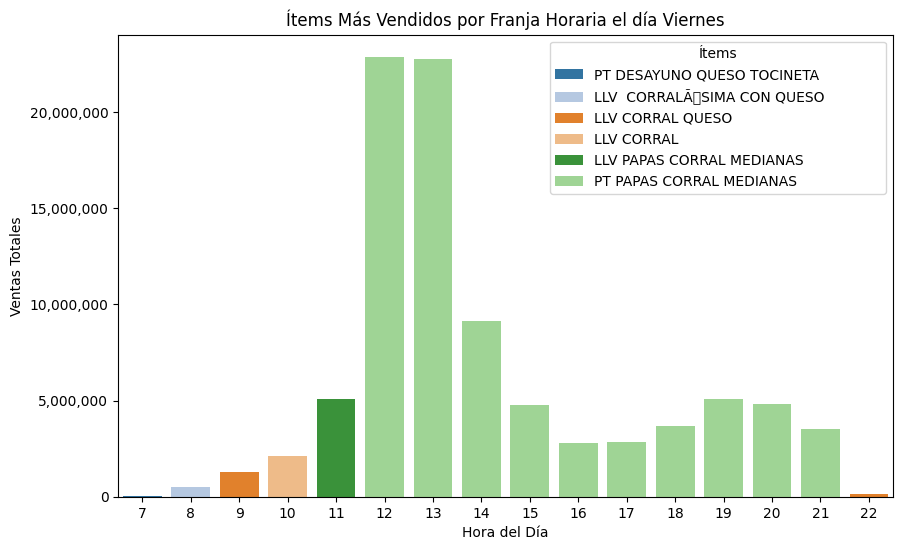

In [59]:
# Gráfico para los ítems más vendidos
plt.figure(figsize=(10, 6))
sns.barplot(x='hora_dia', y='venta_total_viernes', hue='nombre item', data=mas_vendidos_viernes, palette='tab20')  # Usar la paleta 'tab20' para más colores
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x):,}'))
plt.title('Ítems Más Vendidos por Franja Horaria el día Viernes')
plt.xlabel('Hora del Día')
plt.ylabel('Ventas Totales')
plt.legend(title='Ítems')
plt.show()


## Análisis de los items mas vendidos

Las ventas alcanzan su punto máximo entre las 12:00 pm y 1:00 pm, con los productos **PT PAPAS CORRAL MEDIANAS** y **LLV PAPAS CORRAL MEDIANAS** liderando las ventas en esa franja horaria.

Ítems más populares:

- El producto más vendido durante el pico de ventas al mediodía es el **PT PAPAS CORRAL MEDIANAS**, seguido de cerca por **LLV PAPAS CORRAL MEDIANAS**. Esto sugiere una fuerte demanda de papas como acompañamiento en las comidas principales.


c:\Users\JUAN PABLO\Desktop\Juan Manuel U\Prueba nutresa\prueba_nutresa\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 145 (\x91) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


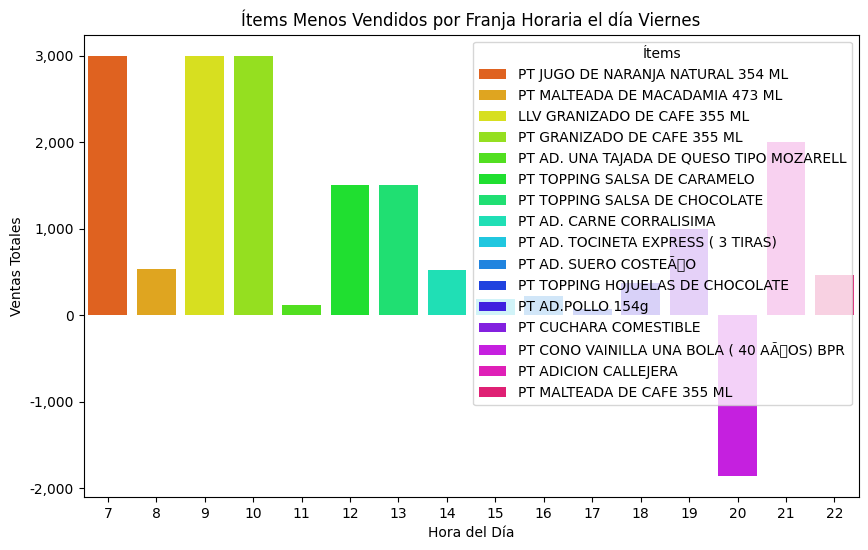

In [60]:
# Calcular la cantidad única de ítems menos vendidos
unique_items = menos_vendidos_viernes['nombre item'].nunique()
palette = sns.color_palette('hsv', unique_items)

plt.figure(figsize=(10, 6))
sns.barplot(x='hora_dia', y='venta_total_viernes', hue='nombre item', data=menos_vendidos_viernes, palette=palette)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x):,}'))
plt.title('Ítems Menos Vendidos por Franja Horaria el día Viernes')
plt.xlabel('Hora del Día')
plt.ylabel('Ventas Totales')
plt.legend(title='Ítems')
plt.show()

## Conclusiones items menos vendidos

Ventas bajas constantes:

Los ítems mostrados tienen volúmenes de ventas consistentemente bajos a lo largo del día, sin grandes fluctuaciones, lo que indica que son productos menos populares entre los clientes los viernes.
Ítems como **PT JUGO DE NARANJA NATURAL** y **GRANIZADO DE CAFE** presentan ventas en las primeras horas del día, pero en volúmenes reducidos en comparación con otros productos.

## Segmentación de clientes por potencial

En este análisis, se realizará una segmentación de clientes con el objetivo de identificar su potencial en función de su comportamiento de compra. Para ello, se agrupan los datos de ventas por cada cliente y se calculan métricas clave que permiten evaluar su relevancia para el negocio. Las métricas utilizadas incluyen:

- **Frecuencia de compra**, que mide cuántas veces ha comprado cada cliente.
- **Gasto total**, que refleja cuánto dinero ha gastado el cliente en total.
- **Cantidad total de productos**, que indica cuántos ítems ha adquirido.

Adicionalmente, se calcula el gasto promedio por compra, dividiendo el gasto total entre la frecuencia de compras, para entender mejor el valor que cada cliente aporta en cada transacción. Este proceso nos permitirá clasificar a los clientes en diferentes segmentos de potencial (alto, medio, bajo) y diseñar estrategias personalizadas para cada uno.








In [61]:
# Agrupar por cliente, calculando la frecuencia de compra y el gasto total
clientes_data = data_clean.groupby('cliente').agg(
    frecuencia_compras=('Factura', 'nunique'),
    gasto_total=('Venta', lambda x: (x + data_clean.loc[x.index, 'impuesto'] - data_clean.loc[x.index, 'descuento']).sum()),
    cantidad_total=('Cantidad', 'sum')
).reset_index()

#promedio de gasto por compra
clientes_data['gasto_promedio'] = clientes_data['gasto_total'] / clientes_data['frecuencia_compras']

# Ver los primeros datos
clientes_data.head(10)

,cliente,frecuencia_compras,gasto_total,cantidad_total,gasto_promedio
0,1,117,6291802,492,53776.085470
1,2,97,5324000,417,54886.597938
2,3,137,6481055,543,47306.970803
3,4,134,6317200,506,47143.283582
4,5,119,6305296,514,52985.680672
5,6,124,6075883,511,48999.056452
6,7,118,7128766,578,60413.271186
7,8,144,7418712,611,51518.833333
8,9,120,6393000,524,53275.000000
9,10,116,5634151,445,48570.267241


Procedemos a estandarizar las variables claves de los clientes (**frecuencia de compra**,**gasto total**, y **gasto promedio**) para asegurar que todas tengan la misma escala antes de aplicar el algoritmo de clustering.

Posteriormente procedemos a aplicar el metodo del codo (Elbow Method) para determinar el número óptimo de cluster.

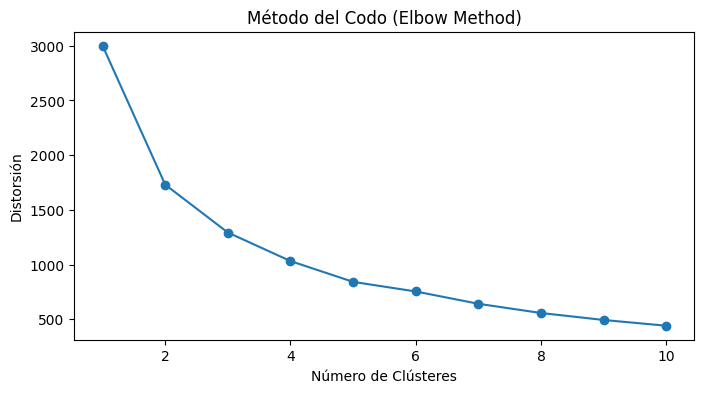

In [30]:
# Estandarizar las variables antes de aplicar clustering
scaler = StandardScaler()
clientes_scaled = scaler.fit_transform(clientes_data[['frecuencia_compras', 'gasto_total', 'gasto_promedio']])

# Determinar el número óptimo de clusters usando el método del codo (Elbow Method)
distorsiones = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=1214)
    kmeans.fit(clientes_scaled)
    distorsiones.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), distorsiones, marker='o')
plt.title('Método del Codo (Elbow Method)')
plt.xlabel('Número de Clústeres')
plt.ylabel('Distorsión')
plt.show()

Observando el gráfico del método del codo (Elbow Method), podemos ver que la distorsión disminuye rápidamente a medida que aumentamos el número de clústeres desde 1 hasta 3, y luego la pendiente comienza a suavizarse. Este resultado sugiere que los clientes pueden agruparse en tres segmentos distintos basados en su frecuencia de compra, gasto total y gasto promedio, lo que permitirá diseñar estrategias específicas para cada grupo.

## K-means

In [31]:
# Aplicar K-Means con el número óptimo de clusters
kmeans = KMeans(n_clusters=3, random_state=42)
clientes_data['segmento'] = kmeans.fit_predict(clientes_scaled)

# Ver los primeros datos segmentados
clientes_data.head()

,cliente,frecuencia_compras,gasto_total,cantidad_total,gasto_promedio,segmento
0,1,117,5866282,492,50139.162393,1
1,2,97,4929619,417,50820.814433,0
2,3,137,6071101,543,44314.605839,1
3,4,134,5849276,506,43651.313433,1
4,5,119,5841663,514,49089.605042,1


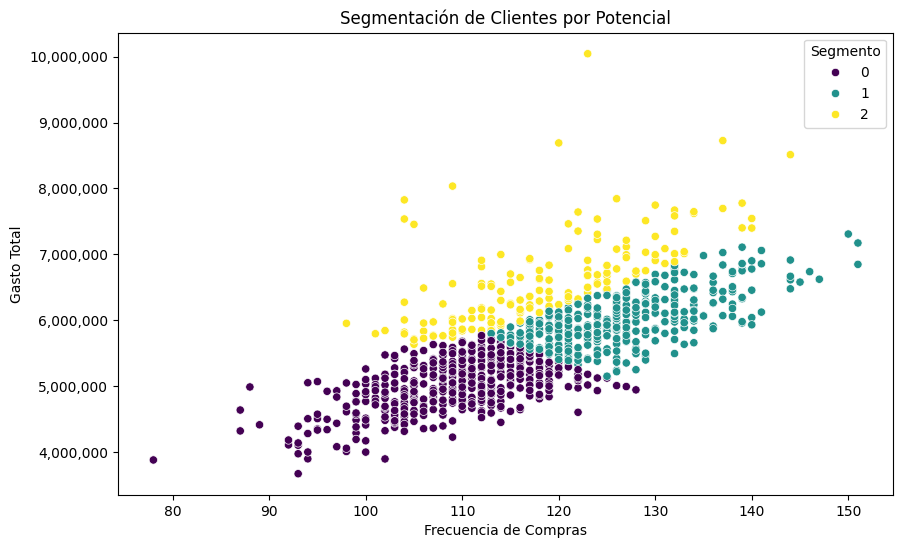

In [32]:
# Visualizar los segmentos en un gráfico
plt.figure(figsize=(10, 6))
sns.scatterplot(x='frecuencia_compras', y='gasto_total', hue='segmento', data=clientes_data, palette='viridis')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x):,}'))
plt.title('Segmentación de Clientes por Potencial')
plt.xlabel('Frecuencia de Compras')
plt.ylabel('Gasto Total')
plt.legend(title='Segmento')
plt.show()


se visualiza la segmentación de clientes por potencial utilizando los tres grupos identificados por el algoritmo de K-Means. Los clústeres están representados en tres colores: segmento 0, segmento 1 y segmento 2. A continuación, se describe el análisis de cada segmento:

- **Segmento 0**: Este segmento agrupa a los clientes con menor frecuencia de compra y menor gasto total. Este grupo puede considerarse de **bajo potencial**, ya que su contribución al negocio es más baja en comparación con los otros segmentos.

- **Segmento 1**: Se trata de un segmento de **potencial medio**, ya que aunque no son los clientes que más compran, contribuyen de manera significativa al volumen total de ventas.

- **Segmento 2**: Este es el grupo de **mayor potencial**. Los clientes en este clúster tienen la mayor frecuencia de compra superior y el gasto total más elevado.

## Etiquetar cada paciente por su clasificación

   cliente  frecuencia_compras  gasto_total  segmento  nivel_potencial
0        1                 117      5866282         1  Medio Potencial
1        2                  97      4929619         0   Bajo Potencial
2        3                 137      6071101         1  Medio Potencial
3        4                 134      5849276         1  Medio Potencial
4        5                 119      5841663         1  Medio Potencial


C:\Users\JUAN PABLO\AppData\Local\Temp\ipykernel_27132\2408265032.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='nivel_potencial', data=clientes_data, palette='viridis')


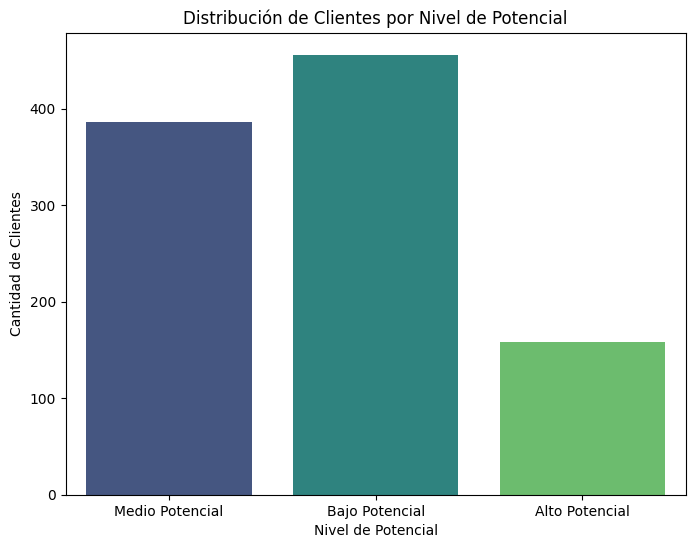

In [33]:
# Asignar etiquetas de potencial a los segmentos
clientes_data['nivel_potencial'] = clientes_data['segmento'].map({
    0: 'Bajo Potencial',
    1: 'Medio Potencial',
    2: 'Alto Potencial'
})

# Ver los primeros datos con el nivel de potencial asignado
print(clientes_data[['cliente', 'frecuencia_compras', 'gasto_total', 'segmento', 'nivel_potencial']].head())

# Visualizar la distribución de los clientes según su nivel de potencial
plt.figure(figsize=(8, 6))
sns.countplot(x='nivel_potencial', data=clientes_data, palette='viridis')
plt.title('Distribución de Clientes por Nivel de Potencial')
plt.xlabel('Nivel de Potencial')
plt.ylabel('Cantidad de Clientes')
plt.show()


## Construcción de un Modelo Predictivo para Clasificar el Potencial de los Clientes

Se procede a construir un modelo para predecir el nivel de potencial de los clientes basado en sus características de compra. Primero, se definen las variables independientes **frecuencia_compras**, **gasto_total**, **gasto_promedio** que servirán como predictores y la variable dependiente **nivel_potencial**, la cual representa la clasificación de clientes en bajo, medio y alto potencial. Dividimos el Dataset en un conjunto de entrenamiento **70%** y un conjunto de prueba **30%**, con el fin de entrenar y evaluar el modelo de manera efectiva.

In [34]:


# Variables independientes: frecuencia_compras, gasto_total, etc.
X = clientes_data[['frecuencia_compras', 'gasto_total', 'gasto_promedio']]

# Variable dependiente: nivel_potencial ya asignado
y = clientes_data['nivel_potencial']

# Convertir las etiquetas a valores numéricos
y = y.map({'Bajo Potencial': 0, 'Medio Potencial': 1, 'Alto Potencial': 2})

# Dividir el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Mostrar algunos datos para verificar
print(X_train.head(), y_train.head())

     frecuencia_compras  gasto_total  gasto_promedio
541                 113      6515543    57659.672566
440                 121      5994392    49540.429752
482                 118      5015963    42508.161017
422                 121      5586855    46172.355372
778                 132      5837082    44220.318182 541    2
440    1
482    0
422    1
778    1
Name: nivel_potencial, dtype: int64


## Arboles de decisión 

En este paso procedemos a utilizar un Árbol de Decisión como modelo de clasificación para predecir el nivel de potencial de los clientes. Los árboles de decisión son modelos de aprendizaje supervisado que se basan en un conjunto de reglas de decisión para dividir los datos en subconjuntos homogéneos, permitiendo clasificar las observaciones en diferentes categorías.

In [35]:
# Crear y entrenar el modelo
modelo_arbol = DecisionTreeClassifier(random_state=42)
modelo_arbol.fit(X_train, y_train)

# Predecir el nivel de potencial en los datos de prueba
y_pred = modelo_arbol.predict(X_test)


In [36]:
# Evaluar el rendimiento del modelo
print("Accuracy del modelo:", accuracy_score(y_test, y_pred))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred, target_names=['Bajo Potencial', 'Medio Potencial', 'Alto Potencial']))


Accuracy del modelo: 0.9833333333333333

Reporte de Clasificación:
                  precision    recall  f1-score   support

 Bajo Potencial       0.99      0.99      0.99       135
Medio Potencial       0.99      0.97      0.98       116
 Alto Potencial       0.96      1.00      0.98        49

       accuracy                           0.98       300
      macro avg       0.98      0.99      0.98       300
   weighted avg       0.98      0.98      0.98       300



## Análisis de resultados árboles de decisión

El modelo de Árbol de Decisión para predecir el nivel de potencial de los clientes logró un Accuracy de 0.983, lo que indica que el 98.3% de las predicciones fueron correctas en el conjunto de datos de prueba.

Analicemos las metricas de rendimiento para cada categoria:

- **Bajo potencial**: Precisión de 0.99 y Recall de 0.99, con un F1-Score de 0.99. Esto indica un rendimiento muy alto en la clasificación de clientes de "Bajo potencial".

- **Medio potencial**: Precisión de 0.99 y Recall de 0.97, con un F1-Score de 0.98. Esto indica un rendimiento también muy alto en la clasificación de clientes de "Medio Potencial", aunque ligeramente inferior al de la categoría de bajo potencial.

- **Alto potencial**: Precisión de 0.96 y Recall de 1, con un F1-Score de 0.98. Esto significa que todos los clientes de "Alto Potencial" fueron correctamente clasificados, pero algunos clientes no pertenecientes a este grupo fueron clasificados incorrectamente como de alto potencial.


### Conclusión

El modelo de Árbol de Decisión ha demostrado ser altamente efectivo para clasificar a los clientes en diferentes niveles de potencial (bajo, medio, alto), con una precisión general de 98% en el conjunto de prueba.

## Regresión logística

Analizaremos un modelo de Regresión Logística para predecir el nivel de potencial de los clientes y comparar su desempeño con el modelo de Árbol de Decisión. Esto permitirá evaluar cuál de los dos modelos ofrece una mejor precisión y clasificación de los clientes, determinando así el modelo más efectivo para esta segmentación.

In [67]:
# Crear y entrenar el modelo de regresión logística
modelo_logistico = LogisticRegression(random_state=1214, max_iter=1000)
modelo_logistico.fit(X_train, y_train)

# Predecir el nivel de potencial en los datos de prueba
y_pred_log = modelo_logistico.predict(X_test)

# Evaluar el rendimiento del modelo de regresión logística
print("Accuracy del modelo de Regresión Logística:", accuracy_score(y_test, y_pred_log))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred_log, target_names=['Bajo Potencial', 'Medio Potencial', 'Alto Potencial']))


Accuracy del modelo de Regresión Logística: 0.9933333333333333

Reporte de Clasificación:
                  precision    recall  f1-score   support

 Bajo Potencial       1.00      0.99      1.00       135
Medio Potencial       0.99      0.99      0.99       116
 Alto Potencial       0.98      1.00      0.99        49

       accuracy                           0.99       300
      macro avg       0.99      0.99      0.99       300
   weighted avg       0.99      0.99      0.99       300



## Análisis de resultados regresión logística
Analicemos las métricas de rendimiento para cada categoría en la Regresión Logística:

- **Bajo Potencial**: Precisión de 1.00 y Recall de 0.99, con un F1-Score de 1.00. Esto indica que el modelo clasifica casi perfectamente a los clientes de bajo potencial.

- **Medio Potencial**: Precisión y Recall de 0.99, con un F1-Score de 0.99. El modelo es muy preciso en la clasificación de estos clientes, manteniendo un equilibrio sólido entre precisión y recall.

- **Alto Potencial**: Precisión de 0.98 y Recall de 1.00, con un F1-Score de 0.99. Todos los clientes de alto potencial son correctamente clasificados, con una ligera variabilidad en la precisión.

### Conclusión
El modelo de Regresión Logística demuestra un rendimiento ligeramente superior al de Árbol de Decisión, con una precisión general del 99% en el conjunto de prueba, lo que lo convierte en una opción altamente efectiva para la segmentación de clientes por potencial.

# Conclusiones generales

## Extrategias de marketing personalizadas

- **Clientes de bajo potencial**:

  - Estrategia 1: Campaña de prueba de nuevos productos

    - Objetivo: Aumentar la frecuencia de visitas y crear hábito de compra.

    - Descripción: Ofrecer muestras gratuitas o precios reducidos en nuevos productos para incentivar que estos clientes prueben diferentes opciones del menú. Esto genera más oportunidades para que se interesen por productos específicos y regresen por más.


  - Estrategia 2: Descuentos en horas de menor actividad

    - Objetivo: Fomentar compras en horas bajas y aumentar la visibilidad.
    
    - Descripción: Ofrecer promociones especiales durante horas en las que el flujo de clientes sea menor (por ejemplo, "Happy Hour" o descuentos por la mañana). Esto ayudará a incentivar la visita de estos clientes en horarios donde se busque incrementar las ventas.


- **Clientes de medio potencial**:

  - Estrategia 1: Tarjeta de cliente frecuente

    - Objetivo: Incrementar la recurrencia de compras.

    - Descripción: Ofrecer una tarjeta digital que selle cada compra; luego de un cierto número de compras, el cliente recibe un producto gratis o un descuento significativo en la siguiente compra. Esto incentiva la continuidad y regularidad de las visitas.


  - Estrategia 2: Personalización de experiencias

    - Objetivo:  Mejorar la experiencia y retención del cliente.
    
    - Descripción: Ofrecer opciones de personalización en el menú para estos clientes, como toppings o salsas adicionales a bajo costo. La posibilidad de crear productos personalizados puede mejorar su experiencia y satisfacción, y generar un motivo adicional para regresar.


- **Clientes de alto potencial**:

  - Estrategia 1: Eventos exclusivos para clientes VIP

    - Objetivo: Fortalecer la relación y exclusividad con los clientes.

    - Descripción: Organizar eventos exclusivos, como cenas temáticas, o lanzamientos de nuevos productos para estos clientes. La invitación exclusiva no solo fortalece la relación sino que incentiva a los clientes a ser más leales y frecuentes en sus compras.

  - Estrategia 2: Beneficios de "Cliente Gold"

    - Objetivo:  Recompensar a los mejores clientes y mantener su compromiso a largo plazo.
    
    - Descripción: Crear un programa de membresía "Cliente Gold" donde estos clientes reciban beneficios como prioridad en filas, acceso anticipado a promociones, precios especiales en productos de temporada, o experiencias VIP. Esto genera un sentido de exclusividad y valor para mantenerlos comprometidos con el negocio.




